In [1]:
from IPython.display import Math, display
import sympy as sym
#import symengine as se
sym.init_printing(latex_mode='equation*')

In [2]:
r, En = sym.symbols('r, En', real=True, positive=True)

In [3]:
_psi_ = sym.Function('psi')(r)
_V_ = sym.Function('V')(r)

_f_ = sym.Function('f')(r)
_g_ = sym.Function('g')(r)

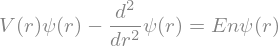

In [4]:
eq_lhs = -sym.diff(_psi_, r, r) + _V_ * _psi_ 
eq_rhs =  En*_psi_

sym.Eq(eq_lhs, eq_rhs)

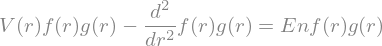

In [5]:
eq_lhs_fg = eq_lhs.subs({_psi_:_f_*_g_})
eq_rhs_fg = eq_rhs.subs({_psi_:_f_*_g_})

sym.Eq(eq_lhs_fg, eq_rhs_fg)

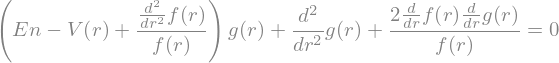

In [6]:
eq_fg = eq_rhs_fg-eq_lhs_fg.doit()
eq_fg = sym.expand(eq_fg/(_f_))
eq_fg = sym.collect(eq_fg , _g_)

sym.Eq(eq_fg, 0)

In [7]:
_lambda0_ = -eq_fg.coeff(sym.diff(_g_,r))
_s0_ = -eq_fg.coeff(_g_)

display(Math("\lambda_0 = %s"%sym.latex(_lambda0_)))
display(Math("s_0 = %s"%sym.latex(_s0_)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# symengine (symbolic) variables for lambda_0 and s_0 
r0, m, α, β, λ, γ = \
sym.symbols("r0, m, α, β, λ, γ", real=True, positive=True)

In [9]:
f = lambda X: r**((m+1)/2)  * sym.exp(-r**2/2 - sym.sqrt(λ)/(m*r**m))

α = 2*(m+1)

V = lambda r: r**β + γ*(γ+1)/r**2 + λ/r**α


In [10]:
lambda0 = sym.simplify(_lambda0_.subs(_f_, f(r)).doit())
s0 = sym.simplify(sym.expand(_s0_.subs({_f_:f(r), _V_:V(r)}).doit()))

display(Math("\lambda_0 = %s"%sym.latex(lambda0)))
display(Math("s_0 = %s"%sym.latex(s0)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
print("l0 = {}".format(lambda0).replace('sqrt', 'se.sqrt'))
print("s0 = {}".format(str(s0).replace('sqrt', 'se.sqrt')))

l0 = -m/r + 2*r - 1/r - 2*r**(-m)*se.sqrt(λ)/r
s0 = -En - m**2/(4*r**2) + m - r**2 + r**β + 2 + 2*r**(-m)*se.sqrt(λ) + γ**2/r**2 + γ/r**2 + 1/(4*r**2)


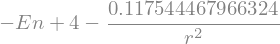

In [19]:
lambda0.subs({m:2, λ:1/10})
s0.subs({m:2, λ:1/10, γ:0, β:2})